In [32]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np
%matplotlib inline

#Importing libraries for stop future warnings
import warnings
warnings.filterwarnings('ignore')

#Importing libraries for Holts Winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Importing libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Loading data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/airline_passengers.csv', 
                   index_col='Month', 
                   parse_dates=True)

In [3]:
#Changing the frequency of the data
data.index.freq = 'MS'

In [4]:
#Checking data
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
#Checking data
data.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
#Train and test split the data
train = data.iloc[:109]
test = data.iloc[108:]

#Checking the size of the data
data.shape, train.shape, test.shape

((144, 1), (109, 1), (36, 1))

In [7]:
#Creating triple exponential smoothing model
model = ExponentialSmoothing(train['Thousands of Passengers'],
                            trend='mul',
                            seasonal='mul',
                            seasonal_periods=12).fit()

c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [8]:
#Prediction on the model
pred = model.predict(start = len(train), end = len(train)+len(test)-1)

In [9]:
#Checking prediction
pred

1958-02-01    339.143032
1958-03-01    399.281896
1958-04-01    394.233997
1958-05-01    402.545543
1958-06-01    473.128522
1958-07-01    521.795005
1958-08-01    514.512937
1958-09-01    446.216497
1958-10-01    385.430919
1958-11-01    339.645080
1958-12-01    381.455910
1959-01-01    401.210107
1959-02-01    387.159306
1959-03-01    455.812702
1959-04-01    450.050116
1959-05-01    459.538420
1959-06-01    540.114621
1959-07-01    595.671363
1959-08-01    587.358291
1959-09-01    509.392359
1959-10-01    440.000688
1959-11-01    387.732435
1959-12-01    435.462892
1960-01-01    458.013911
1960-02-01    441.973782
1960-03-01    520.347207
1960-04-01    513.768747
1960-05-01    524.600416
1960-06-01    616.584692
1960-07-01    680.007224
1960-08-01    670.517177
1960-09-01    581.512736
1960-10-01    502.296509
1960-11-01    442.628055
1960-12-01    497.116246
1961-01-01    522.860066
Freq: MS, dtype: float64

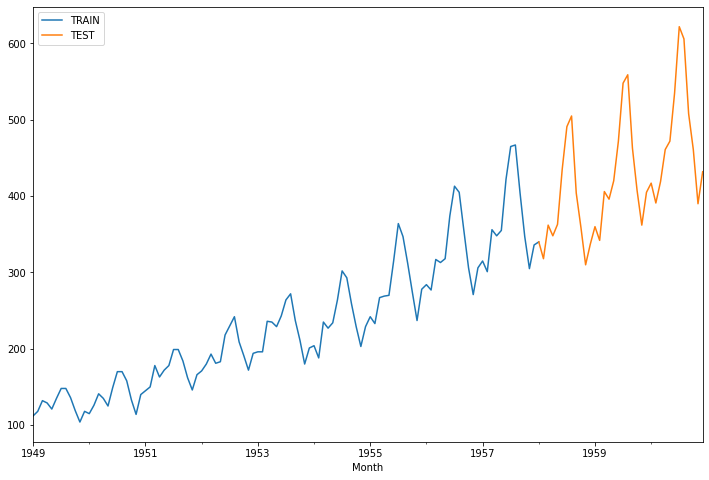

In [10]:
#Plotting the data
train['Thousands of Passengers'].plot(legend = True, label = 'TRAIN', figsize = (12,8));
test['Thousands of Passengers'].plot(legend = True, label = 'TEST', figsize = (12,8));

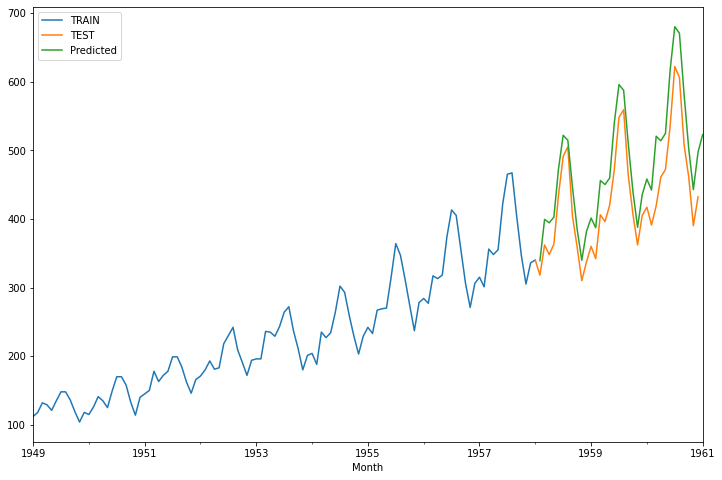

In [11]:
#Plotting the data
train['Thousands of Passengers'].plot(legend = True, label = 'TRAIN', figsize = (12,8));
test['Thousands of Passengers'].plot(legend = True, label = 'TEST', figsize = (12,8));
pred.plot(legend = True, label = 'Predicted', figsize = (12,8));

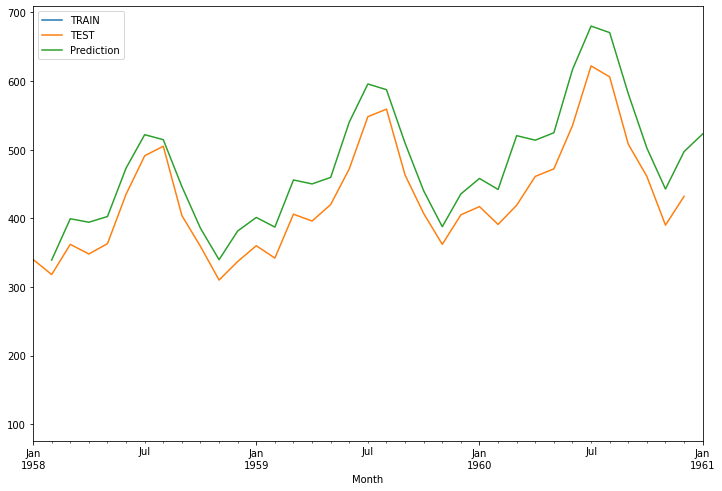

In [12]:
#Plotting the data from 1958 to 1961 (3 years)
train['Thousands of Passengers'].plot(legend = True, label = 'TRAIN', figsize = (12,8));
test['Thousands of Passengers'].plot(legend = True, label = 'TEST', figsize = (12,8));
pred.plot(legend = True, label = 'Prediction', xlim = ['1958-01-01','1961-01-01']);

# Evaluation of forecast

In [27]:
#Creating function for model evaluation matrix
def evaluation_matrix(test_data, prediction_data):
    MAE = mean_absolute_error(test_data, prediction_data)
    RMSE = np.sqrt(mean_squared_error(test_data, prediction_data))
    Mean = test_data.mean()
    print('Mean Absolute Error     =', MAE)
    print('Root Mean Squared Error =', RMSE)
    print('Mean                    =',Mean)

In [28]:
#Evaluation the model
evaluation_matrix(test['Thousands of Passengers'], pred)

Mean Absolute Error     = 63.031188493774
Root Mean Squared Error = 74.92840108968834
Mean                    = 428.5


In [38]:
#Computing standard deviation
data['Thousands of Passengers'].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Thousands of Passengers, dtype: float64

# Retrain the model on Original Data

In [33]:
#Creating exponential smoothing model
final_model = ExponentialSmoothing(data['Thousands of Passengers'],
                            trend='mul',
                            seasonal='mul',
                            seasonal_periods=12).fit()

In [37]:
#Prediction on the model for next 3 years 1961, 1962 & 1962
pred2 = final_model.forecast(36)
pred2.rename('Prediction')

1961-01-01    450.675038
1961-02-01    424.818302
1961-03-01    475.494610
1961-04-01    504.076432
1961-05-01    517.871956
1961-06-01    590.145563
1961-07-01    684.227343
1961-08-01    678.031123
1961-09-01    567.112047
1961-10-01    507.823958
1961-11-01    434.718578
1961-12-01    485.979827
1962-01-01    502.745585
1962-02-01    473.901386
1962-03-01    530.432785
1962-04-01    562.316923
1962-05-01    577.706368
1962-06-01    658.330396
1962-07-01    763.282290
1962-08-01    756.370165
1962-09-01    632.635610
1962-10-01    566.497434
1962-11-01    484.945530
1962-12-01    542.129454
1963-01-01    560.832310
1963-02-01    528.655482
1963-03-01    591.718463
1963-04-01    627.286462
1963-05-01    644.453988
1963-06-01    734.393236
1963-07-01    851.471168
1963-08-01    843.760423
1963-09-01    705.729700
1963-10-01    631.949985
1963-11-01    540.975655
1963-12-01    604.766552
Freq: MS, Name: Prediction, dtype: float64

In [36]:
#Alternative ways to prediction on the model for next 3 years 1961, 1962 & 1962
pred2A = final_model.predict(start = len(data), end = len(data)+36-1)
pred2A

1961-01-01    450.675038
1961-02-01    424.818302
1961-03-01    475.494610
1961-04-01    504.076432
1961-05-01    517.871956
1961-06-01    590.145563
1961-07-01    684.227343
1961-08-01    678.031123
1961-09-01    567.112047
1961-10-01    507.823958
1961-11-01    434.718578
1961-12-01    485.979827
1962-01-01    502.745585
1962-02-01    473.901386
1962-03-01    530.432785
1962-04-01    562.316923
1962-05-01    577.706368
1962-06-01    658.330396
1962-07-01    763.282290
1962-08-01    756.370165
1962-09-01    632.635610
1962-10-01    566.497434
1962-11-01    484.945530
1962-12-01    542.129454
1963-01-01    560.832310
1963-02-01    528.655482
1963-03-01    591.718463
1963-04-01    627.286462
1963-05-01    644.453988
1963-06-01    734.393236
1963-07-01    851.471168
1963-08-01    843.760423
1963-09-01    705.729700
1963-10-01    631.949985
1963-11-01    540.975655
1963-12-01    604.766552
Freq: MS, dtype: float64

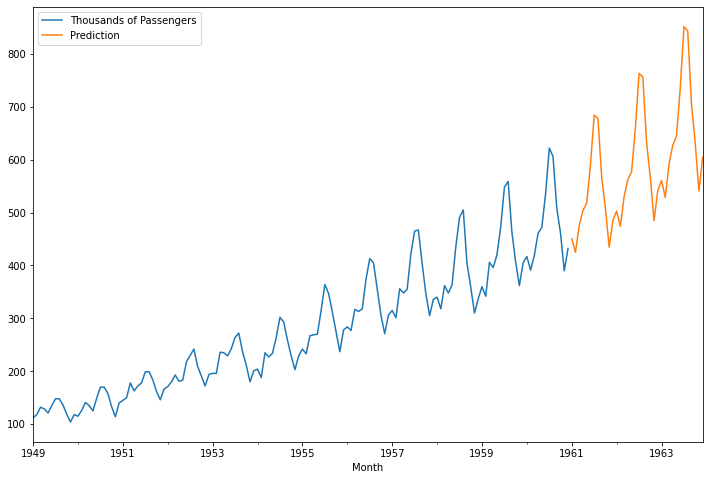

In [39]:
#Plotting the original data
data['Thousands of Passengers'].plot(figsize = (12,8), legend = True);
pred2.plot(label = 'Prediction', legend = True);